In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\zeyne\Desktop\Career\Projects\AB_Testing\website_ab_test.csv')

In [4]:
data.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


In [5]:
data.isnull().sum()

Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64

In [6]:
data.describe()

,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Session_Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.256048,0.253312,0.505758,50.319494,41.528000,924.999000
std,0.139265,0.139092,0.172195,16.895269,14.114334,508.231723
min,0.010767,0.010881,0.200720,20.011738,18.000000,38.000000
25%,0.140794,0.131564,0.353609,35.655167,29.000000,466.500000
50%,0.253715,0.252823,0.514049,51.130712,42.000000,931.000000
75%,0.370674,0.373040,0.648557,64.666258,54.000000,1375.250000
max,0.499989,0.498916,0.799658,79.997108,65.000000,1797.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


Let's look at the relationship between Click Through Rate and Conversion Rate

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


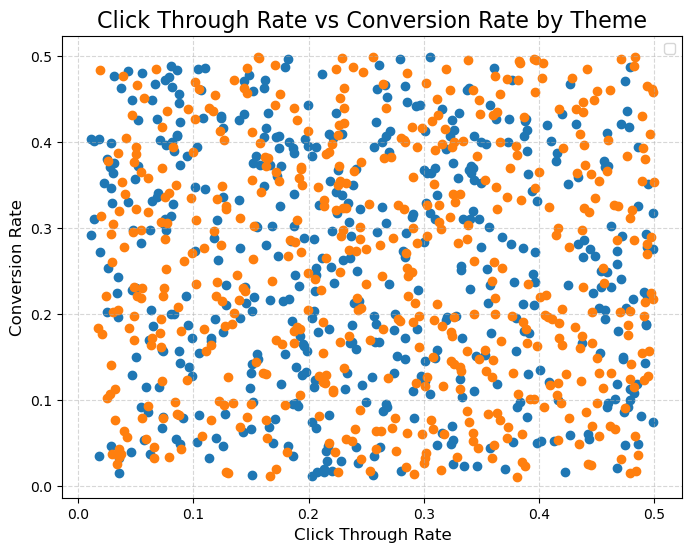

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(light_theme['Click Through Rate'], light_theme['Conversion Rate'])
plt.scatter(dark_theme['Click Through Rate'], dark_theme['Conversion Rate'])

plt.title('Click Through Rate vs Conversion Rate by Theme', fontsize=16)
plt.xlabel('Click Through Rate', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5, linestyle='--')


We can see that there is a weak relationship. As more users click on links or buttons, the proportion of users signing up remains stable.

Let's look at the histogram of the Click Through Rate of both themes

In [9]:
light_theme = data[data['Theme'] == 'Light Theme']
dark_theme = data[data['Theme'] == 'Dark Theme']

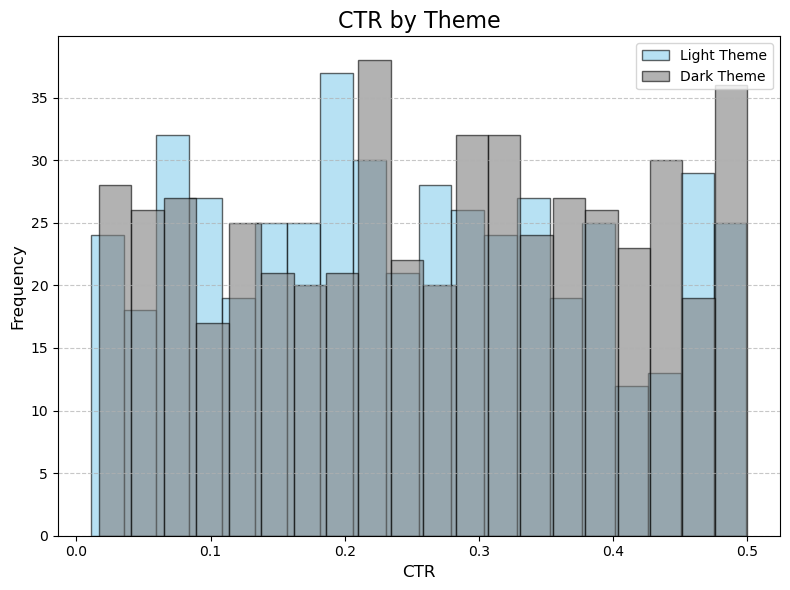

In [27]:
plt.figure(figsize=(8, 6))

plt.hist(light_theme['Click Through Rate'], bins=20, alpha=0.6, label='Light Theme', color='skyblue', edgecolor='black')
plt.hist(dark_theme['Click Through Rate'], bins=20, alpha=0.6, label='Dark Theme', color='gray', edgecolor='black')

plt.title('CTR by Theme', fontsize=16)
plt.xlabel('CTR', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.legend(loc='upper right', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


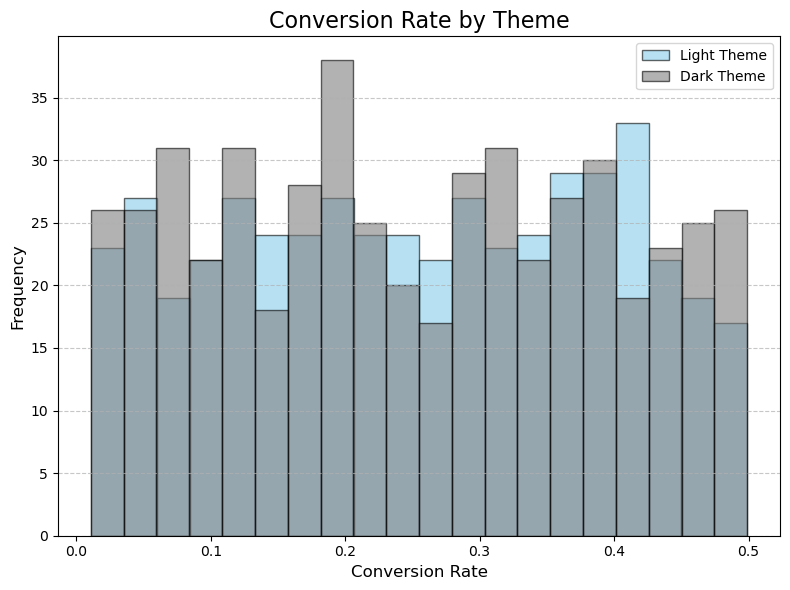

In [ ]:
plt.figure(figsize=(8, 6))

plt.hist(light_theme['Conversion Rate'], bins=20, alpha=0.6, label='Light Theme', color='skyblue', edgecolor='black')
plt.hist(dark_theme['Conversion Rate'], bins=20, alpha=0.6, label='Dark Theme', color='gray', edgecolor='black')

plt.title('Conversion Rate by Theme', fontsize=16)
plt.xlabel('Conversion Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.legend(loc='upper right', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


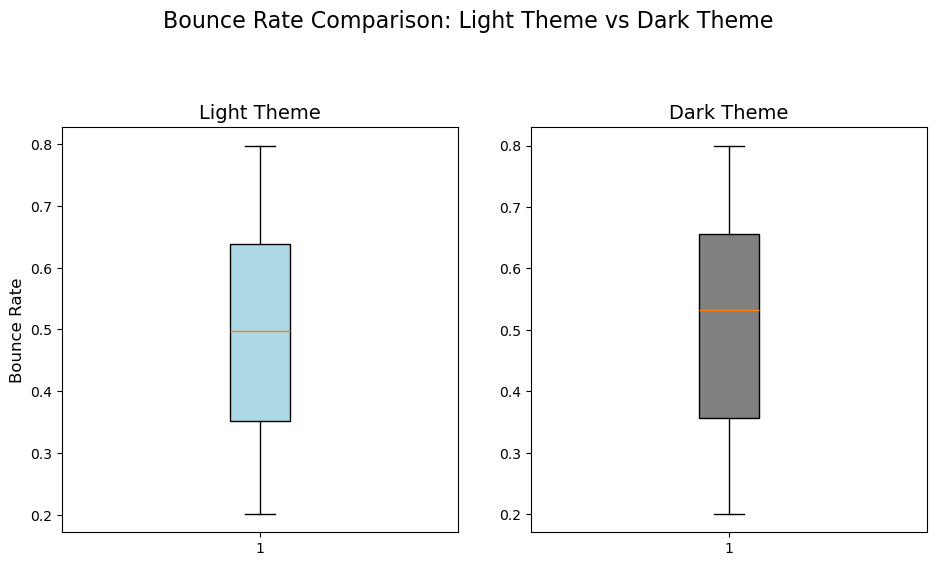

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Boxplot for Light Theme
plt.subplot(1, 2, 1) 
plt.boxplot(light_theme['Bounce Rate'], patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Light Theme', fontsize=14)
plt.ylabel('Bounce Rate', fontsize=12)

# Boxplot for Dark Theme
plt.subplot(1, 2, 2)  # (1 row, 2 columns, second subplot)
plt.boxplot(dark_theme['Bounce Rate'], patch_artist=True, boxprops=dict(facecolor="gray"))
plt.title('Dark Theme', fontsize=14)

plt.suptitle('Bounce Rate Comparison: Light Theme vs Dark Theme', fontsize=16)
plt.tight_layout(pad=3.0)
plt.show()


There is not much difference between the bounce rates of themes, but the bounce rate of the light theme is slightly lower(it is slightly better).

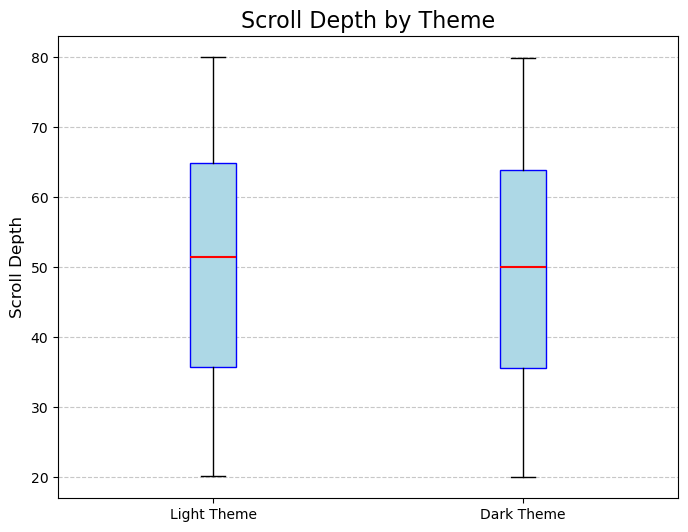

In [25]:
plt.figure(figsize=(8, 6))
data = [light_theme['Scroll_Depth'], dark_theme['Scroll_Depth']]

plt.boxplot(data, labels=['Light Theme','Dark Theme'], patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'), 
            medianprops=dict(color='red', linewidth=1.5))
plt.title('Scroll Depth by Theme', fontsize=16)
plt.ylabel('Scroll Depth', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The scroll depth of light theme is slightly better.

**Comparison of Themes based on Purchases**

In [14]:
# A/B testing for Purchases
light_theme_conversions = light_theme[light_theme['Purchases']=='Yes'].shape[0]
light_theme_total = light_theme.shape[0]

dark_theme_conversions = dark_theme[dark_theme['Purchases']=='Yes'].shape[0]
dark_theme_total = dark_theme.shape[0]

conversion_counts = [light_theme_conversions, dark_theme_conversions]
sample_sizes = [light_theme_total, dark_theme_total]

light_theme_conversion_rate = light_theme_conversions / light_theme_total
dark_theme_conversion_rate = dark_theme_conversions / dark_theme_total

#Performing two sample proportion test
zstat, pvalue = proportions_ztest(conversion_counts, sample_sizes)
print('Light Theme Conversion Rate:', light_theme_conversion_rate)
print('Dark Theme Conversion Rate:', dark_theme_conversion_rate)
print('A/B testing z-statistic:', zstat, 'p-value:', pvalue)

Light Theme Conversion Rate: 0.5308641975308642
Dark Theme Conversion Rate: 0.5038910505836576
A/B testing z-statistic: 0.8531246206222649 p-value: 0.39359019934127804


Since the p-value is greater than the significance level of 0.05, we can't say light theme is better than dark theme based on purchases.

**Now let's look at comparison of both themes based on Session Duration**

In [15]:
light_theme_session_duration = light_theme['Session_Duration']
dark_theme_session_duration = dark_theme['Session_Duration']


light_theme_avg_session_duration = light_theme['Session_Duration'].mean()
dark_theme_avg_session_duration = dark_theme['Session_Duration'].mean()

tstat, pvalue = stats.ttest_ind(light_theme_session_duration, dark_theme_session_duration)

print('Light Theme Average Session Durarion:', light_theme_avg_session_duration)
print('Dark Theme Average Session Durarion:', dark_theme_avg_session_duration)
print('A/B testing t-statistic:', tstat)
print('p-value:', pvalue)

Light Theme Average Session Durarion: 930.8333333333334
Dark Theme Average Session Durarion: 919.4824902723735
A/B testing t-statistic: 0.3528382474155483
p-value: 0.7242842138292167


Since the p-value is much greater than significane level of 0.05, we don't have enough evidence to say that light theme is better than dark theme based on session duration.